In [1]:
tau=0.01

In [2]:
s <- function(x,y) ifelse(x<=tau, 0, ((1-y)/(y*tau)) * exp(-((1-y)/(y*tau))*(x-tau)))

In [3]:
s1 <- function(x,y) ifelse(s(x,y)==0, 0, log(s(x,y)))

In [4]:
s2 <- function(x,y) s(x,y)*s1(x,y)

In [5]:
h <- function(y) -(integrate(s2, tau, Inf, y=y)$value)

In [6]:
h_x <- Vectorize(h)

In [7]:
Ch <- function(y){
    sapply(y, function(x) if (x<1) ((1-x)/tau)*exp(h_x(x)-1) else NaN)
        }

In [8]:
y <- seq(0.1,2,0.1)

In [9]:
Ch(y)

[1] 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
[20] NaN

In [10]:
q <- function(x,y) ifelse(x > 1/tau, 0, ((1-y)/tau)*s((1/x),y)*(1/(x^{3})))

In [11]:
logq <- function(x,y) ifelse(q(x,y)==0, 0, log(q(x, y)))

In [12]:
q2 <- function(x,y) ifelse(q(x,y)==0, 0, q(x,y)*logq(x,y))

In [13]:
hq <- function(y) -(integrate(q2, lower=0, upper=(1/tau), y=y)$value)

In [14]:
HQ <- Vectorize(hq)

In [17]:
Ch2 <- function(y){
    sapply(y, function(x) if (x<1) (tau/(1-x))*exp(HQ(x)-1) else NaN)
        }

In [18]:
Ch2(y)

[1] 0.1089613 0.2313521 0.3597183 0.4859149 0.6015614 0.6985532 0.7695318
 [8] 0.8081926 0.8091032       NaN       NaN       NaN       NaN       NaN
[15]       NaN       NaN       NaN       NaN       NaN       NaN

In [12]:
df <- data.frame("CV"=y, "y1"=Ch)

In [13]:
require(ggplot2)
require(reshape2)

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: reshape2


In [14]:
library("repr")
options(repr.plot.width=5, repr.plot.height=5)

Warning message:
"Removed 21 rows containing missing values (geom_path)."

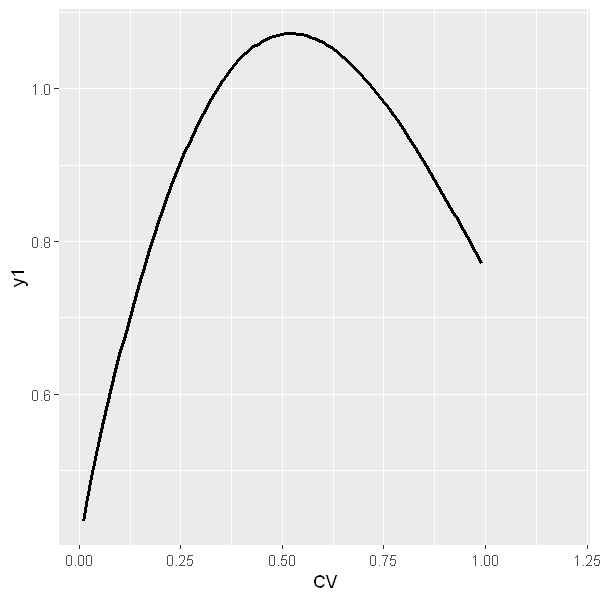

In [15]:
ggplot(df, aes(x=CV, y=y1)) + geom_line(lwd=1)

In [ ]:
Randomness <- function(y)  